In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
data_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
data_train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [5]:
data_train['color'].value_counts()

white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64

In [6]:
data_train['type'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

c:\python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


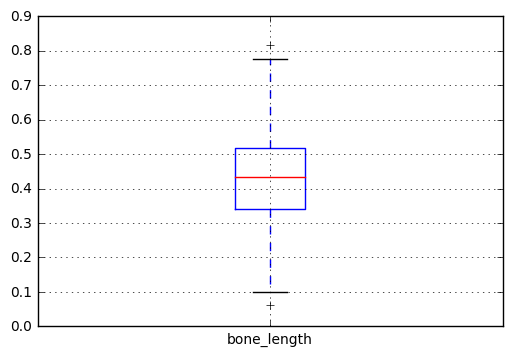

In [7]:
data_train.boxplot(column='bone_length')
plt.show()

In [8]:
##formating
def drop(df):
    df=df.drop('id',axis=1)
    return df

In [9]:
data_train=drop(data_train)
test_ids=data_test['id']
data_test=drop(data_test)

In [10]:
y_labeled=list(data_train['type'])

In [11]:
data_train=data_train.drop('type',axis=1)

In [12]:
data_train_dict=data_train.T.to_dict().values()

In [13]:
##vectorizing
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer()
X=vec.fit_transform(data_train_dict).toarray()

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y_labeled)
print y

[1 2 1 1 0 2 2 1 0 0 2 1 1 2 2 1 0 1 1 0 2 1 2 1 1 0 2 2 2 2 1 0 2 2 1 0 0
 1 1 0 1 0 0 2 1 2 1 0 2 2 1 1 0 2 0 2 0 2 0 1 2 2 1 2 1 0 0 1 0 1 1 0 0 1
 1 2 2 0 1 1 0 0 0 2 0 2 1 2 1 1 0 1 2 1 2 2 0 2 2 0 0 0 0 2 2 0 1 2 2 1 0
 2 1 0 2 0 0 2 0 1 2 2 0 2 1 0 0 2 1 1 1 1 1 2 2 1 2 2 2 1 2 2 0 2 1 0 0 2
 2 2 0 0 0 1 0 1 2 2 0 0 0 2 2 1 2 2 1 2 0 0 2 0 2 0 0 0 1 0 2 1 0 0 1 0 2
 2 0 0 0 1 1 2 1 0 2 1 1 2 0 0 1 1 1 2 0 0 1 2 2 2 2 1 2 0 2 1 1 0 0 1 0 2
 2 1 2 1 1 2 0 1 1 2 1 1 2 2 2 1 1 2 1 1 0 0 0 0 0 0 1 1 2 0 1 2 0 0 1 0 1
 2 0 0 2 0 2 2 0 0 2 2 2 0 0 1 1 2 0 0 2 1 2 1 1 0 1 0 2 1 1 1 0 1 1 0 1 1
 2 0 2 0 0 2 0 1 1 1 1 1 1 2 1 2 1 2 2 2 1 2 1 1 2 0 0 2 1 1 1 1 0 1 1 0 2
 0 2 0 0 1 1 1 2 2 1 2 0 1 2 0 2 1 0 2 1 2 0 2 2 1 0 1 1 1 2 0 2 1 2 0 1 0
 1]


In [15]:
X[0:5]

array([[ 0.35451218,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.46576089,  0.78114167,  0.35083903],
       [ 0.57555991,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.53140138,  0.43989888,  0.42586843],
       [ 0.4678755 ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.81161609,  0.79122497,  0.35433042],
       [ 0.77665246,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.63676558,  0.88446369,  0.50872255],
       [ 0.5661166 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.41859367,  0.63643782,  0.8758618 ]])

In [16]:
##splitting the data
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)
X_train_pca=X_train
X_test_pca=X_test
X_pca=X

In [17]:
##performing Pca
from sklearn.decomposition import PCA
pca=PCA(n_components=10).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
X_pca=pca.transform(X)
print pca.explained_variance_ratio_[0]
print X_pca[0]

0.413350826363
[  7.23433083e-01   3.03656186e-01  -3.19191651e-02  -3.85806972e-02
   1.01902641e-01  -3.26392833e-02  -4.67695890e-02  -2.92532444e-01
  -9.25084418e-02  -2.46078178e-17]


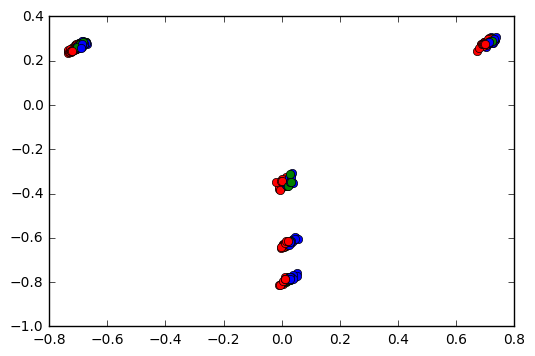

In [18]:
##plotting the data
color=['ro','bo','go']
from matplotlib import pyplot as plt
for i in range(len(X_pca)):
    plt.plot(X_pca[i,0],X_pca[i,1],color[y[i]])
plt.show()

In [27]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from time import time
params=[
  {'C': [1, 10, 100, 1000], 'gamma': [0.01,0.1,0.001, 0.0001], 'kernel': ['rbf','linear']},
 ]

parameters = {'n_estimators': [15,20,30,100,120], 
              'max_features': ['log2', 'auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2,  5,10,15,20],
             }
clf=RandomForestClassifier(n_estimators=150,min_samples_split=12)
clf=GridSearchCV(RandomForestClassifier(),parameters)
clf=GridSearchCV(SVC(),params)
#clf=GaussianNB()
#clf=AdaBoostClassifier()
#clf=DecisionTreeClassifier(min_samples_split=10)
#clf=SVC(kernel='rbf',gamma=0.001,C=100)
t0=time()
clf.fit(X_train,y_train)
print "Training time is",round(time()-t0,3)
t1=time()
pred=clf.predict(X_test)
print "Predicting time",round(time()-t1,3)
print clf.score(X_test,y_test)

Training time is 1.072
Predicting time 0.001
0.732142857143


In [30]:
clf1=clf.best_estimator_
print clf1
clf1.fit(X,y)
clf1.score(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.77897574123989222

In [31]:
from sklearn.cross_validation import KFold
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
y=np.array(y,dtype=int)
def run_kfold(clf):
    kf = KFold(371, n_folds=10)
    print kf
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)

sklearn.cross_validation.KFold(n=371, n_folds=10, shuffle=False, random_state=None)
Fold 1 accuracy: 0.684210526316
Fold 2 accuracy: 0.675675675676
Fold 3 accuracy: 0.810810810811
Fold 4 accuracy: 0.675675675676
Fold 5 accuracy: 0.783783783784
Fold 6 accuracy: 0.783783783784
Fold 7 accuracy: 0.756756756757
Fold 8 accuracy: 0.594594594595
Fold 9 accuracy: 0.783783783784
Fold 10 accuracy: 0.675675675676
Mean Accuracy: 0.722475106686


In [132]:
data_test_dict=data_test.T.to_dict().values()

In [133]:
X_test_data=vec.transform(data_test_dict).toarray()

In [134]:
len(X_test_data)

529

In [135]:
y_test_d=clf1.predict(X_test_data)

In [136]:
y_test_labeled=encoder.inverse_transform(y_test_d)

In [137]:
b=zip(test_ids,y_test_labeled)

In [138]:
df_write=pd.DataFrame(y_test_labeled,columns=['type'],index=test_ids)

In [139]:
df_write.to_csv('result.csv')